# K-Means
- Common clustering technique, helps to solve many problems efficiently.
- K-Means is an example of Hard Clustering, where every point belongs only to one cluster.

In [1]:
# importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# Creating the datatset
def generate_blobs(n_pts,centers):
    return make_blobs(n_samples=n_pts,n_features=2,centers=centers,random_state =10)

In [3]:
def plot_data(X):
    plt.figure(0)
    plt.grid("on")
    plt.scatter(X[:,0],X[:,1],color="orange")
    plt.show()

In [4]:
def make_clusters(k,colors):
    clusters = {}

    # Creating the dict for all clusters
    for kx in range(k):
        centre = 5.0*(2*np.random.random((X.shape[1],))-1)
        points = []
        cluster = {
            'centre':centre,
            'points':points,
            'color':colors[kx]
        }
        clusters[kx] = cluster
    return clusters
    

In [5]:
# Using Euclidean distance. We can use many other distance for eg.mahalonobis_distance etc.
def euclidean_dist(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [15]:
# One Iteration
def one_iter(X,clusters,dist_method):
    # Assigning point to the cluster by finding distance with center of all clusters and assigning the min dist cluster to it.
    # E-step
    for i in range(X.shape[0]):
        dist = []
        curr_x = X[i]
        # Iterating over all clusters
        for kx in range(k):
            d = dist_method(curr_x,clusters[kx]['centre'])
            dist.append(d)

        # Finding the min dist cluster no.
        current_cluster_assigned = np.argmin(dist)
        clusters[current_cluster_assigned]['points'].append(curr_x)

    # changing points from list to numpy array
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        clusters[kx]['coords'] = pts

    #PLotting the assigned pts with clusters
    plt.figure(0)
    plt.grid("on")
    plt.title("After assigning pts to cluster")
    for kx in range(k):
        pts = clusters[kx]['coords']
        try:
            plt.scatter(pts[:,0],pts[:,1],color = clusters[kx]['color'])
        except:
            pass

        center = clusters[kx]['centre']
        plt.scatter(center[0],center[1],color="black",s=100,marker="*")
    plt.show()

    # Re-calculating the centres of the clusters
    # M-Step
    for kx in range(k):
        # check if cluster has atleast 1 pt assigned
        if (clusters[kx]['coords'].shape[0] > 0):
            new_center = clusters[kx]['coords'].mean(axis=0)
        else:
            new_center = clusters[kx]['centre']

        clusters[kx]['centre'] = new_center
        clusters[kx]['points'] = []

    plt.figure(1)
    plt.grid("on")
    plt.title("After re-calculating the centers after assignment of pts")
    for kx in range(k):
        pts = clusters[kx]['coords']
        try:
            plt.scatter(pts[:,0],pts[:,1],color = clusters[kx]['color'])
        except:
            pass

        center = clusters[kx]['centre']
        plt.scatter(center[0],center[1],color="black",s=100,marker="*")
    plt.show()


In [16]:
def kmeans_run(X,k,colors,n_iter=10,iter_func=one_iter,dist_method=euclidean_dist):
    # used the pretty printer module to make dict print in a readable way
    import pprint
    pp = pprint.PrettyPrinter(indent=4)
    
    clusters = make_clusters(k,colors)
    print("Clusters are: ")
    pp.pprint(clusters)
    
    for i in range(n_iter):
        print("After ",i+1," iteration results")
        iter_func(X,clusters,dist_method)

Shape of X and y  (500, 2) (500,) 

Clusters are: 
{   0: {   'centre': array([2.18404934, 0.95681556]),
           'color': 'green',
           'points': []},
    1: {   'centre': array([ 0.9194598, -3.6828471]),
           'color': 'red',
           'points': []},
    2: {   'centre': array([ 0.75812868, -0.09786097]),
           'color': 'blue',
           'points': []},
    3: {   'centre': array([ 0.63820944, -2.22812941]),
           'color': 'orange',
           'points': []},
    4: {   'centre': array([-0.59050012,  2.21621856]),
           'color': 'yellow',
           'points': []}}
After  1  iteration results


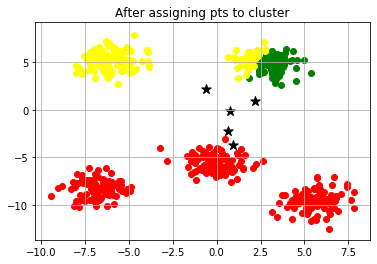

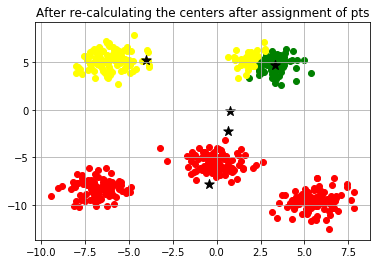

After  2  iteration results


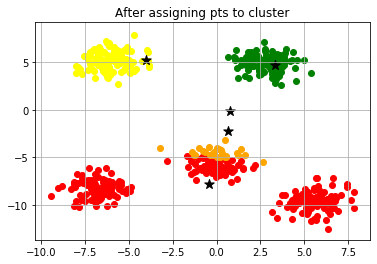

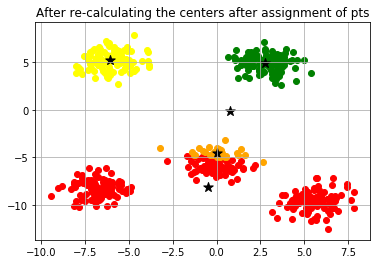

After  3  iteration results


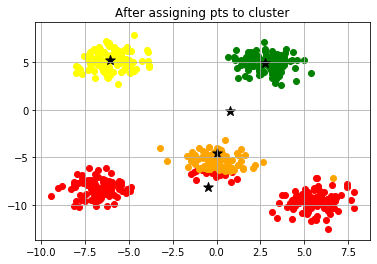

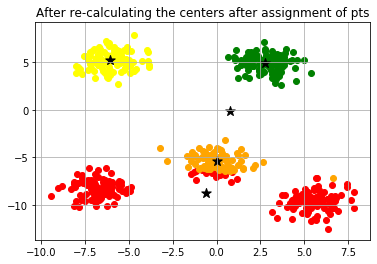

After  4  iteration results


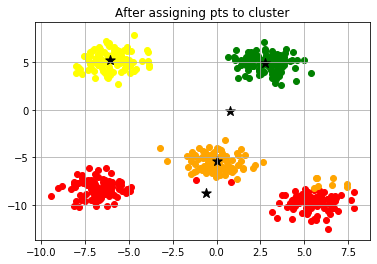

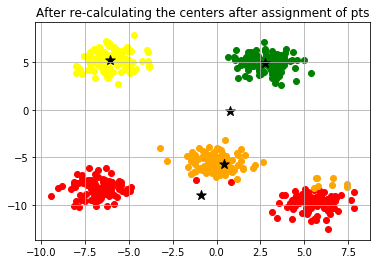

After  5  iteration results


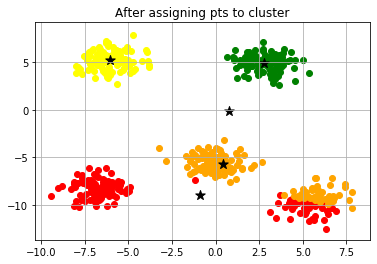

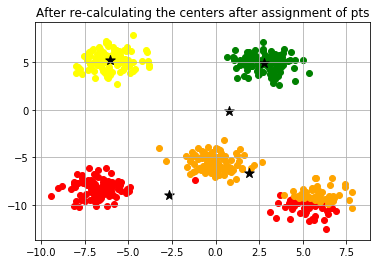

After  6  iteration results


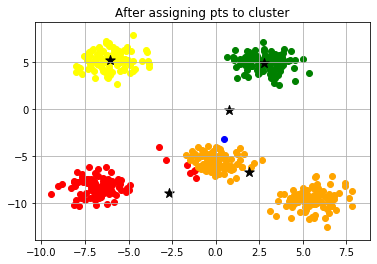

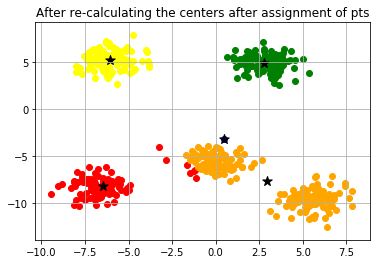

After  7  iteration results


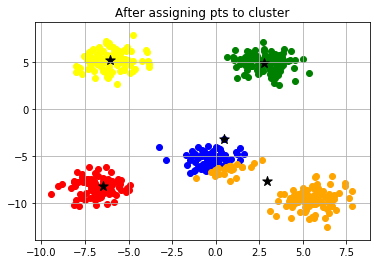

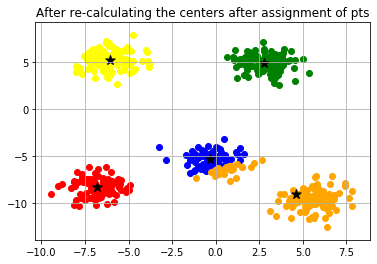

After  8  iteration results


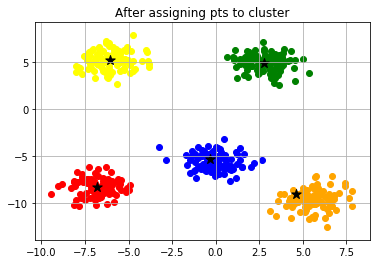

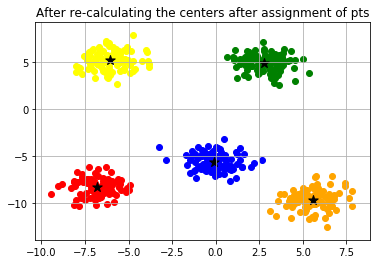

After  9  iteration results


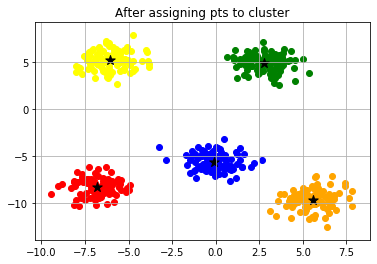

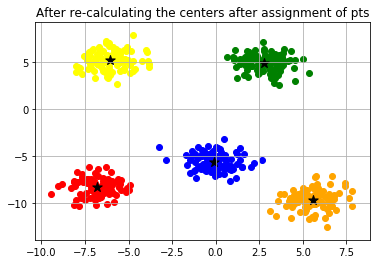

After  10  iteration results


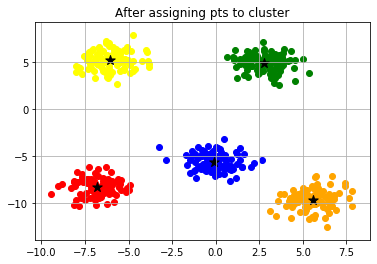

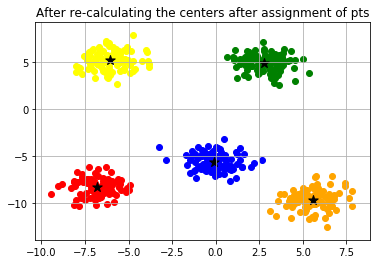

In [17]:
n_pts = 500
k = 5

X,y = generate_blobs(n_pts,k)
print("Shape of X and y ",X.shape,y.shape,"\n")

colors = ["green","red","blue","orange","yellow","pink"]
kmeans_run(X,k,colors)

## Drawbacks
- Works on only spherical clusters
- It does not don anything with outliers
- K-Means is quite sensitive to initalization, if the init is not good, our algorithm is not able to make desired number of clusters.
- To overcome this problem, we use technique called K-Means++ (described in paper Robust Seed Selection for K-Means type of Algorithms) which chooses initial centers so that they are statiscallly close to final ones.